In [16]:
import matplotlib.pyplot as plt
import pandas as pd

### Gráfica Pie

El gráfico de torta o gráfico de pie es una herramienta para visualizar la distribución ya sea porcentual o no de los datos en función de ciertas categorías. Sin embargo, tiene limitaciones importantes, esto quiere decir:

- El número de categorias a graficar debe ser pequeño.  
- Nos permite interpretar facilmente y de manera rápida la información.




Para ello requerimos de:

- 2 listas: Una que contenga la categoria y el otro su valor correspondiente.

Para graficar usamos:

- ax.pie(): Permite graficar la torta.

A contiuación exponemos un ejemplo:

([<matplotlib.patches.Wedge at 0x2d4d8ecd040>,
 [Text(-0.06727792606062476, 1.097940654436742, 'Perro'),
  Text(-0.45695659020408813, -1.000595160226679, 'Gato'),
  Text(0.9707736320630895, -0.5172992898613311, 'Raton')],
 [Text(-0.03669705057852259, 0.5988767206018591, '51.9%'),
  Text(-0.24924904920222987, -0.5457791783054612, '32.5%'),
  Text(0.5295128902162306, -0.28216324901527146, '15.6%')])

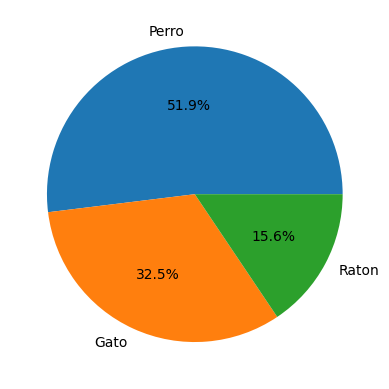

In [17]:
#Creamos las 2 listas
animales = ["Perro", "Gato", "Raton"]
total = [40, 25, 12]

#
fig, ax = plt.subplots()
#Creamos la grafica pie
#Asignamos el total
#Asignamos a labels la lista de animales
#usamos autopct para mostrar el porcentaje que le corresponde

ax.pie(total, labels= animales, autopct= '%1.1f%%')

Ahora procederemos a realizar un ejercicio desde la lectura de un archivo:

En esta ocasión vamos a realizar una gráfica de Pie obteniendo en base al género el total de cada uno.

Para ello Generar:

- Nuevo Dataframe: Agrupado por el "sexo", obtendremos el total
- Grafica:
    -ax.pie(df["Total], labels= df["Genero"])
    -autopct: mostrar el total en porcentaje
    -startangle: darle un angulo a la gráfica


([<matplotlib.patches.Wedge at 0x2d4d8ee62a0>,
 [Text(-1.0910905124412207, -0.13971933889320656, 'Hombre'),
  Text(1.0910904669148236, 0.13971969441561463, 'Mujer')],
 [Text(-0.595140279513393, -0.07621054848720357, '54.1%'),
  Text(0.5951402546808128, 0.07621074240851707, '45.9%')])

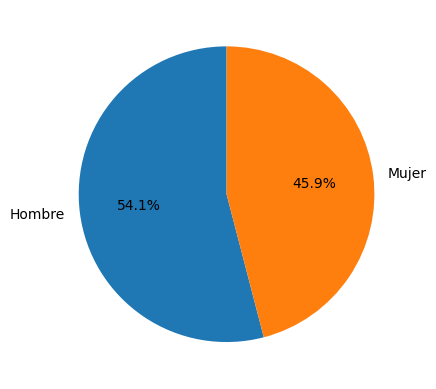

In [22]:
df_modalidad_virtual = pd.read_csv("data/ModalidadVirtual.csv", parse_dates=["time"])

df_genero = df_modalidad_virtual.groupby("sexo").size().reset_index(name="Total")
df_genero.columns = ["Genero", "Total"]
 


fig, ax = plt.subplots()
ax.pie(df_genero["Total"], 
       labels=df_genero["Genero"],
       autopct='%1.1f%%',
       startangle=90
       )


 
### Mostrar el Valor Real en las Etiquetas

Para que las etiquetas del gráfico muestren el **valor real** en lugar del porcentaje, haremos lo siguiente:

#### Paso 1: Usar `autopct`
- Modificaremos el parámetro `autopct` para usar una función personalizada que calcule el valor real.

#### Paso 2: Definir la función
La función que usaremos tendrá **dos parámetros**:
- `pc`: Representa el porcentaje asignado.
- `lista`: Es el total de ambos géneros (o cualquier conjunto de valores).

#### Paso 3: Calcular el valor real
Dentro de la función:
1. Sumamos todos los valores de la lista para obtener el total.
2. Retornamos el valor real 



([<matplotlib.patches.Wedge at 0x2d4d8edcf50>,
 [Text(-1.0910905124412207, -0.13971933889320656, 'Hombre'),
  Text(1.0910904669148236, 0.13971969441561463, 'Mujer')],
 [Text(-0.595140279513393, -0.07621054848720357, '120.0'),
  Text(0.5951402546808128, 0.07621074240851707, '102.0')])

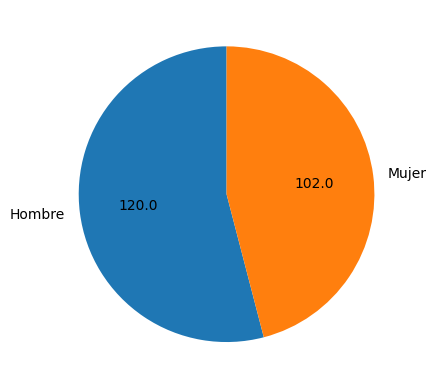

In [19]:
def valor_real(pc, lista_genero):
    total = sum(lista_genero)
    return round(total* (pc / 100),1)

fig, ax = plt.subplots()
ax.pie(df_genero["Total"],
         labels=df_genero["Genero"],
         autopct=lambda pct: valor_real(pct, df_genero["Total"]),
         startangle=90
         )